# Capstone 3: Step 4 - Pre-processing and Training Data Development

# The Data Science Method



1. Problem Identification

2. Data Wrangling

3. Exploratory Data Analysis

4.Pre-processing and Training Data Development


 - Create dummy or indicator features for categorical variables
 - Standardize the magnitude of numeric features
 - Split into testing and training datasets
 - Apply scaler to the testing set




1. Modeling

  - Fit Models with Training Data Set
  - Review Model Outcomes — Iterate over additional models as needed.
  - Identify the Final Model





2. Documentation

   - Review the Results
   - Present and share your findings - storytelling
   - Finalize Code
   - Finalize Documentation



In [23]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import kpss
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
import warnings
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
# print the current working directory
print(os.getcwd())

C:\Users\arna_mora\Unit 24


In [24]:
#Loading the datasets

true_df = pd.read_csv('True.csv')
fake_df = pd.read_csv('Fake.csv')

In [25]:
true_df.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [26]:
fake_df.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [27]:
true_df['check'] = 'TRUE'
fake_df['check'] = 'FAKE'

In [28]:
true_df.head()

,title,text,subject,date,check
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",TRUE
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",TRUE
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",TRUE
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",TRUE
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",TRUE


In [29]:
fake_df.head()

,title,text,subject,date,check
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",FAKE
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",FAKE
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",FAKE
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",FAKE
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",FAKE


In [53]:
#We will combine both dfs.
df_news = pd.concat([true_df, fake_df])

In [54]:
df_news = pd.concat([true_df, fake_df]).dropna(axis=1)

In [55]:
df_news['check'] = df_news['check'].astype(str)
df_news['check'] = df_news['check'].str.strip()
dict = { 'TRUE' : '1' , 'FAKE' : '0'}
df_news['check'] = df_news['check'].map(dict)
df_news.head()

,title,text,subject,date,check
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


# Extracting the training data

In [10]:
y = df_news["check"] 
X = df_news.drop("check", axis=1)

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(df_news['text'], y, test_size=0.33, random_state=53)

# Building Vectorizer Classifiers

To get a good idea if the words and tokens in the articles had a significant impact on whether the news was fake or real, we should begin by using CountVectorizer and TfidfVectorizer.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize the 'count_vectorizer' 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the 'tfidf_vectorizer' 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [16]:
# Get the feature names of `tfidf_vectorizer` 
print(tfidf_vectorizer.get_feature_names()[-10:])

# Get the feature names of `count_vectorizer` 
print(count_vectorizer.get_feature_names()[:10])

['zzjjpdaivn', 'zzn3bqnfsk', 'zzpx_bzka40police', 'zzqvyk8xif', 'zztaine', 'zzuml4hkoc', 'zzzzaaaacccchhh', 'zzzzzzzz', 'zzzzzzzzzzzzz', 'émigré']
['00', '000', '0000', '00000017', '00004', '00007', '000270', '00042', '0005', '0009']


# Modeling

I fit five ML models to the data,
Logistic Regression, Naive-Bayes, Random Forest, XGBoost and Passive-Aggressive Classifier.

# Logistic Regression

In [75]:
#LOGISTIC REGRESSION


from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(tfidf_train, y_train)
Accuracy = logreg.score(tfidf_test, y_test)

print(Accuracy*100)

98.38023891476007


In [92]:
pred = logreg.predict(tfidf_test)
cm0 = confusion_matrix(y_test, pred, labels=['FAKE','TRUE'])
print(cm0)
print(classification_report(y_test, pred))

[[7506  133]
 [ 107 7071]]
              precision    recall  f1-score   support

        FAKE       0.99      0.98      0.98      7639
        TRUE       0.98      0.99      0.98      7178

    accuracy                           0.98     14817
   macro avg       0.98      0.98      0.98     14817
weighted avg       0.98      0.98      0.98     14817



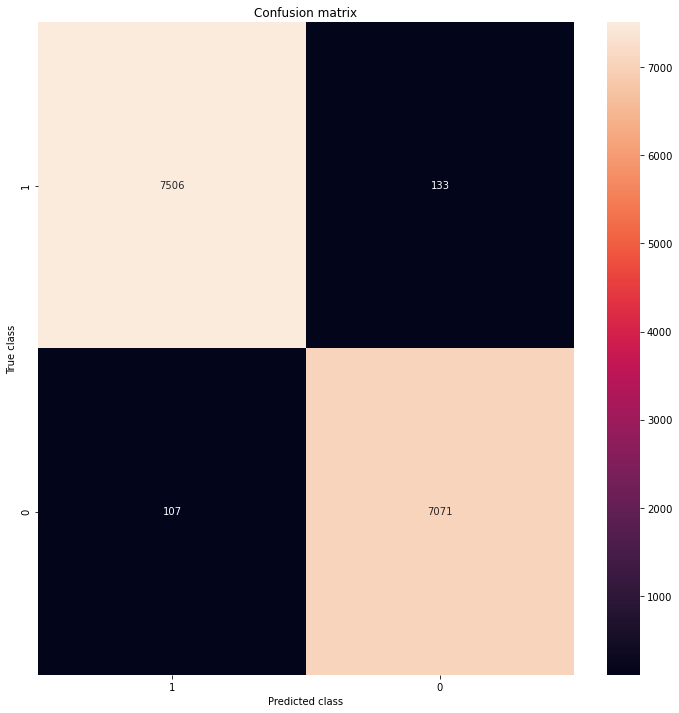

In [118]:
# printing the confusion matrix 
dict = { 'TRUE' : '1' , 'FAKE' : '0'}
df_news['check'] = df_news['check'].map(dict)
labels = [1, 0] 
cm0 = confusion_matrix(y_test, pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(cm0, xticklabels = labels,  
            yticklabels = labels, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In Confusion matrix, 7506 out of 7639 fake news are detected, 133 cases are not detected and 107 false positive are identified.

# PassiveAggressiveClassifier

In [116]:
#initialize a PassiveAggressive Classifier 
from sklearn.metrics import accuracy_score
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)
#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 99.37%


In [121]:
#DataFlair - Build confusion matrix
cm1 = confusion_matrix(y_test, y_pred, labels=['FAKE','TRUE'])
print(cm1)
print(classification_report(y_test, y_pred))

[[7592   47]
 [  47 7131]]
              precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      7639
        TRUE       0.99      0.99      0.99      7178

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



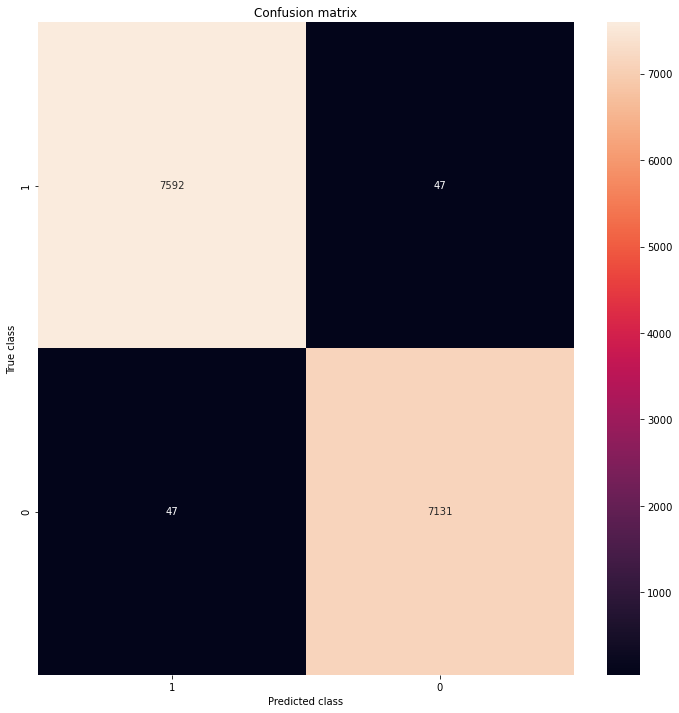

In [123]:
# printing the confusion matrix 
dict = { 'TRUE' : '1' , 'FAKE' : '0'}
df_news['check'] = df_news['check'].map(dict)
labels = [1, 0]  
cm1 = confusion_matrix(y_test, y_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(cm1, xticklabels = labels,  
            yticklabels = labels, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In Confusion matrix, 7592 out of 7639 fake news are detected, 47 cases are not detected and 47 false positive are identified.

# Naive-Bayes

In [72]:
#NAIVE BAYES

from sklearn.naive_bayes import MultinomialNB


NB = MultinomialNB()
NB.fit(tfidf_train, y_train)
Accuracy = NB.score(tfidf_test, y_test)

print(Accuracy*100)

93.3589795505163


In [77]:
#Model Evaluation
predictions = NB.predict(tfidf_test)
print(predictions)

['FAKE' 'FAKE' 'TRUE' ... 'FAKE' 'TRUE' 'TRUE']


In [88]:
from sklearn.metrics import classification_report
cm0 = confusion_matrix(y_test, predictions, labels=['FAKE','TRUE'])
print(cm0)
print (classification_report(y_test, predictions))

[[7205  434]
 [ 550 6628]]
              precision    recall  f1-score   support

        FAKE       0.93      0.94      0.94      7639
        TRUE       0.94      0.92      0.93      7178

    accuracy                           0.93     14817
   macro avg       0.93      0.93      0.93     14817
weighted avg       0.93      0.93      0.93     14817



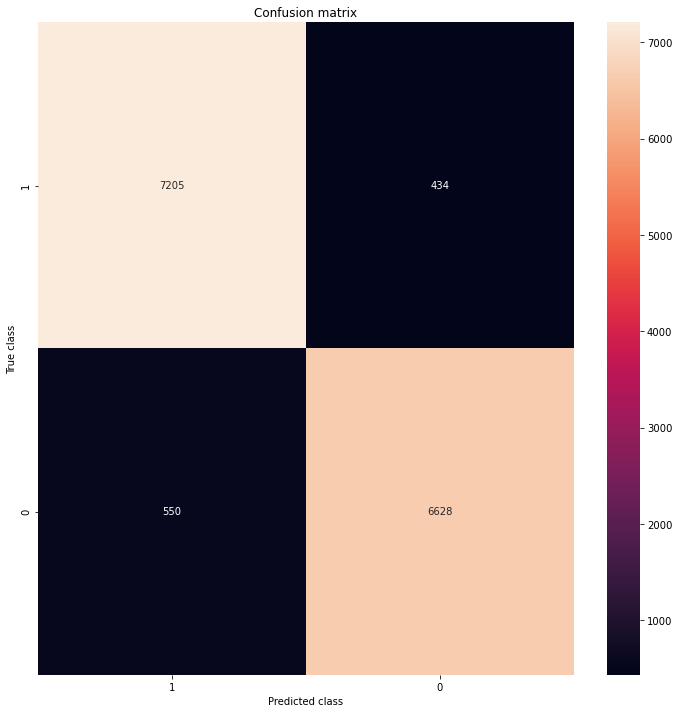

In [124]:
# printing the confusion matrix 
dict = { 'TRUE' : '1' , 'FAKE' : '0'}
df_news['check'] = df_news['check'].map(dict)
labels = [1, 0] 
cm0 = confusion_matrix(y_test, predictions) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(cm0, xticklabels = labels,  
            yticklabels = labels, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In Confusion matrix, 7205 out of 7639 fake news are detected, 434 cases are not detected and 550 false positive are identified.

# Support vector machine

In [100]:
from sklearn.linear_model import SGDClassifier

svc = SGDClassifier().fit(tfidf_train, y_train)

In [101]:
prediction_svc = svc.predict(tfidf_test)

In [102]:
cm1 = confusion_matrix(y_test, prediction_svc,labels=['FAKE','TRUE'])
print(cm1)
print(classification_report(y_test, prediction_svc))

[[7547   92]
 [  57 7121]]
              precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      7639
        TRUE       0.99      0.99      0.99      7178

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



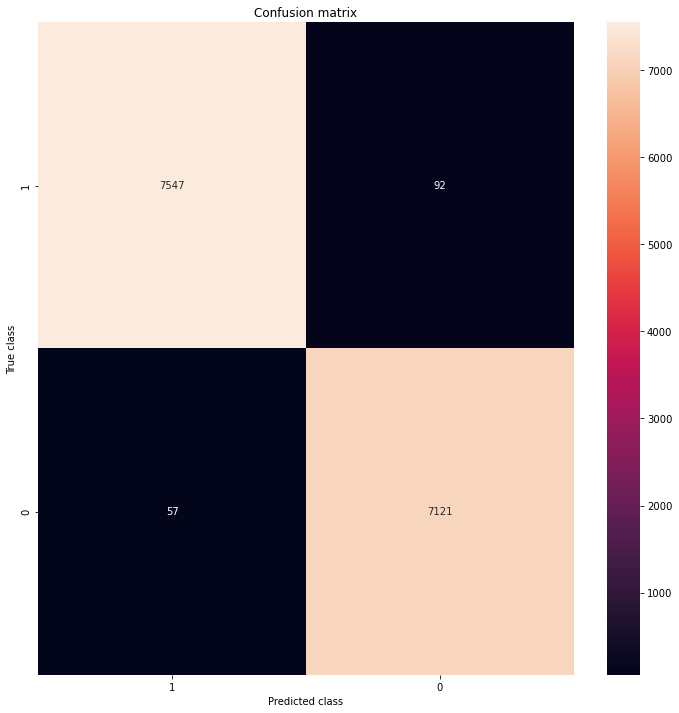

In [125]:
# printing the confusion matrix 
dict = { 'TRUE' : '1' , 'FAKE' : '0'}
df_news['check'] = df_news['check'].map(dict)
labels = [1, 0] 
cm1 = confusion_matrix(y_test, prediction_svc) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(cm1, xticklabels = labels,  
            yticklabels = labels, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In Confusion matrix, 7547 out of 7639 fake news are detected, 92 cases are not detected and 57 false positive are identified.

# Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(tfidf_train, y_train)
prediction_rf = rf.predict(tfidf_test)

In [107]:
cm2 = confusion_matrix(y_test, prediction_rf, labels=['FAKE', 'TRUE'])
print(cm2)
print(classification_report(y_test, prediction_rf))

[[7550   89]
 [  69 7109]]
              precision    recall  f1-score   support

        FAKE       0.99      0.99      0.99      7639
        TRUE       0.99      0.99      0.99      7178

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



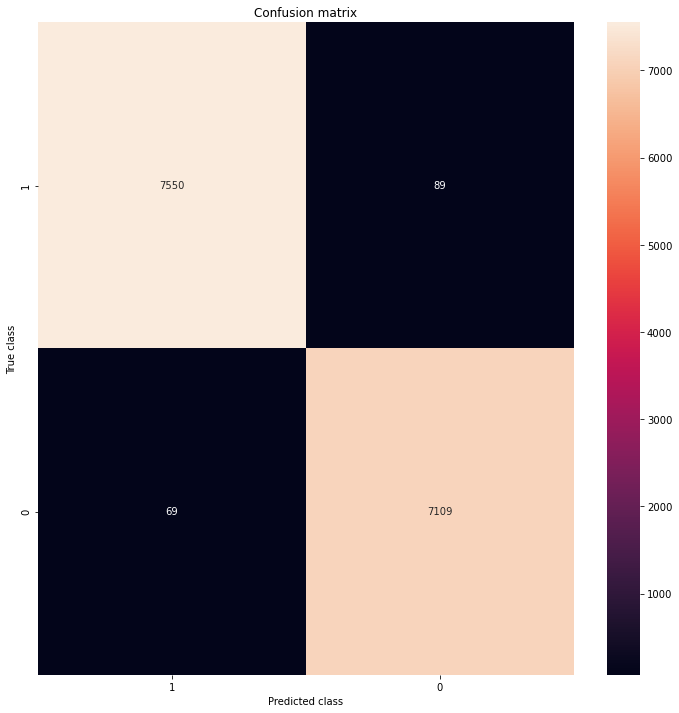

In [126]:
# printing the confusion matrix 
dict = { 'TRUE' : '1' , 'FAKE' : '0'}
df_news['check'] = df_news['check'].map(dict)
labels = [1, 0] 
cm2 = confusion_matrix(y_test, prediction_rf) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(cm2, xticklabels = labels,  
            yticklabels = labels, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 

In Confusion matrix, 7550 out of 7639 fake news are detected, 89 cases are not detected and 69 false positive are identified.

# Conclusion

- We successfully implemented a machine learning and natural language processing model to detect whether an article was fake or fact. In PassiveAggressiveClassifier method We got 7592 articles correctly identified as fake and 7131 correctly identified as real. When doing such a classification, it is important to check that we limit the number of false positives as they can cause facts to be marked as fake.

- I would like to choose PassiveAggressiveClassifier method, because this method has less false positive and false negative.

- So overal PassiveAggressiveClassifier Method performed much better in deterining in fake news cases which is around 99% .


